<a href="https://colab.research.google.com/github/Bharghavis/Voice-classification-using-ML/blob/main/LSTM_and_RNN_Voice_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizer_v1 import rmsprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def extract_mfcc(wav_file_name):
  y,sr=librosa.load(wav_file_name)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [ ]:
#Load speech Dataset
radvess_speech_labels=[]
ravdess_speech_data=[]
for dirname, _ ,filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/archive (1)'):
   for filename in filenames:
     #print(os.path.join(dirname,filename))
     radvess_speech_labels.append(int(filename[7:8]) - 1) # The indix 7 and 8 of the filename represents the emotion label
     wav_file_name=os.path.join(dirname,filename)
     ravdess_speech_data.append(extract_mfcc(wav_file_name))
print("Finish loading the dataset")

Finish loading the dataset


In [ ]:
ravdess_speech_data

[array([-5.2186182e+02,  2.5184629e+01, -1.9940989e+01,  2.9629679e+00,
        -1.1037305e+01, -9.8655767e+00, -9.4929934e+00, -1.3848741e+01,
        -9.5897741e+00, -3.3631999e+00, -9.1064062e+00, -4.3978362e+00,
        -8.4189692e+00, -7.4313593e-01, -1.1230893e+01, -3.7321105e+00,
        -6.0490885e+00, -1.7989588e+00, -1.9294308e-01,  6.6948586e+00,
         8.9765167e-01,  4.1231313e+00, -7.9391301e-01,  1.9002066e+00,
         1.7453592e+00,  5.3810272e+00,  7.7751189e-01,  1.9477277e+00,
        -3.0617211e+00,  6.0956091e-01, -3.9123294e-01,  1.9259760e+00,
        -1.4947675e+00, -3.0557290e-01, -7.5124837e-02,  2.1196940e+00,
        -2.5471082e-01,  1.7147436e+00,  1.5939865e+00,  9.9184126e-01],
       dtype=float32),
 array([-6.0907623e+02,  4.4917633e+01, -1.6826992e+01,  7.3716540e+00,
        -5.4755526e+00, -8.3556347e+00, -7.3710866e+00, -1.2743150e+01,
        -7.0985589e+00, -2.4026425e+00, -7.3419623e+00, -4.1588731e+00,
        -6.1950059e+00, -4.0929005e-01, 

In [ ]:
#Convert data  and label to array 
ravdess_speech_data_array=np.asarray(ravdess_speech_data) #Conver the input to the array
ravdess_speech_label_array=np.array(radvess_speech_labels)
ravdess_speech_label_array.shape #get tuple of array dimensions

#make categorical labels 
labels_categorical=to_categorical(ravdess_speech_label_array) #converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2880, 8)

In [ ]:
ravdess_speech_data_array.shape

(2880, 40)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20,random_state=9)

In [ ]:
from sklearn.utils import validation
#Split the training,validating and testing sets
number_of_samples=ravdess_speech_data_array.shape[0]
training_samples=int(number_of_samples*0.8)
validation_samples=int(number_of_samples*0.1)
test_samples=int(number_of_samples*0.1)

In [ ]:
#define the LSTM model 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  #configure the model for taining
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model

In [ ]:
w= np.expand_dims(ravdess_speech_data_array[:training_samples], -1)

In [ ]:
w.shape

(2304, 40, 1)

In [ ]:
#train using LSTM Model
model_A = create_model_LSTM()
history=model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples], -1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1),labels_categorical[training_samples:training_samples+validation_samples]), epochs=130,shuffle=True)

Epoch 1/130
72/72 [==============================] - 6s 49ms/step - loss: 2.0706 - accuracy: 0.1415 - val_loss: 2.0557 - val_accuracy: 0.1528
Epoch 2/130
72/72 [==============================] - 3s 40ms/step - loss: 2.0499 - accuracy: 0.1697 - val_loss: 2.0401 - val_accuracy: 0.2118
Epoch 3/130
72/72 [==============================] - 3s 40ms/step - loss: 2.0195 - accuracy: 0.2001 - val_loss: 1.9756 - val_accuracy: 0.2535
Epoch 4/130
72/72 [==============================] - 3s 40ms/step - loss: 1.9759 - accuracy: 0.2387 - val_loss: 1.9254 - val_accuracy: 0.2604
Epoch 5/130
72/72 [==============================] - 3s 40ms/step - loss: 1.9275 - accuracy: 0.2517 - val_loss: 1.8748 - val_accuracy: 0.3194
Epoch 6/130
72/72 [==============================] - 3s 40ms/step - loss: 1.8804 - accuracy: 0.2760 - val_loss: 1.8764 - val_accuracy: 0.2639
Epoch 7/130
72/72 [==============================] - 4s 49ms/step - loss: 1.8719 - accuracy: 0.2661 - val_loss: 1.8549 - val_accuracy: 0.2743
Epoch 

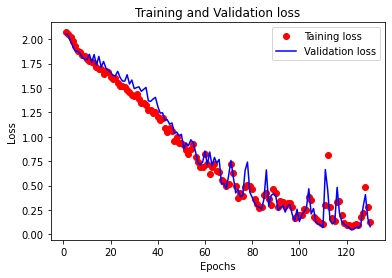

In [ ]:
#Loss plots using LSTM model
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Taining loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

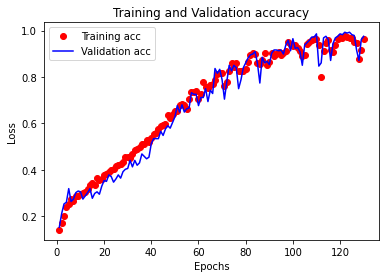

In [ ]:
#Accuracy plots using LSTM Model
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Evaluate using Model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:], -1),labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 25ms/step - loss: 0.0743 - accuracy: 0.9757


[0.07434018701314926, 0.9756944179534912]

In [ ]:
emotions = {1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'suprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/archive (1)/Actor_03/03-01-01-01-01-01-03.wav')

neutral


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/archive (1)/Actor_16/03-01-03-01-01-02-16.wav')

happy


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/archive (1)/Actor_21/03-01-02-01-02-02-21.wav')

calm


In [ ]:
model_A.save('mymodel.h5')

In [ ]:
modelc=tf.keras.models.load_model('mymodel.h5')